# ![University Logo](https://redintercol.net/images/Logo_EAFIT.svg.png)
## **Trabajo 2**
### Mariel Viviana Sánchez
### Laura Riveros
### Maria del Rosario Castro Mantilla

#**Paso 4:**
Realizar Análisis de sentimientos y completar la columna ‘sentiment1’ o ‘sentiment2’
del dataset. Se suministran 30 mil tuits ya con Análisis de Sentimiento, y los profesores
cuentan con el resto de los tuits analizados para validar la capacidad de predicción del
modelo empleado por uds. Además, realizar un modelo de clasificación de tuits que permita
estimar el grupo al cual pertenece, puede utilizar ‘search_hashtags’ como labels o los tópicos
detectados con LDA.

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.1 MB/s eta 0:00:00


In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
import gensim
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/FINAL/climateTwitterData.csv')  # Especifica la ruta a tu archivo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-eb9eeb2f0ff7>:4: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/FINAL/climateTwitterData.csv')  # Especifica la ruta a tu archivo


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Definir stopwords en español
stop_words = set(stopwords.words('spanish'))

# Función de limpieza de texto
def limpiar_texto(tuit):
    tuit = re.sub(r'http\S+', '', tuit)  # Eliminar URLs
    tuit = re.sub(r'@\w+', '', tuit)     # Eliminar menciones
    tuit = re.sub(r'#\w+', '', tuit)     # Eliminar hashtags
    tuit = re.sub(r'\d+', '', tuit)      # Eliminar números
    tuit = re.sub(r'[^\w\s]', '', tuit)  # Eliminar puntuaciones
    tuit = tuit.lower()                  # Convertir a minúsculas
    tuit = ' '.join([word for word in tuit.split() if word not in stop_words])
    return tuit

# Aplicar la limpieza a la columna de tuits
df['tuit_limpio'] = df['text'].apply(limpiar_texto)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from textblob import TextBlob

# Función para obtener el sentimiento del tuit
def obtener_sentimiento(tuit):
    analisis = TextBlob(tuit)
    if analisis.sentiment.polarity > 0:
        return 'positivo'
    elif analisis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negativo'

# Aplicar el análisis de sentimiento en la columna limpia
df['sentiment3'] = df['tuit_limpio'].apply(obtener_sentimiento)

print(df[['sentiment3','sentiment1']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      sentiment3 sentiment1
0       negativo   negative
1        neutral   positive
2       positivo   positive
3       negativo   positive
4       positivo   positive
...          ...        ...
72400   positivo        NaN
72401   positivo        NaN
72402    neutral        NaN
72403   positivo        NaN
72404   positivo        NaN

[72405 rows x 2 columns]


#**Modelo de Clasificación**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorizar los tweets
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
tweets_vectorized = vectorizer.fit_transform(df['tuit_limpio'])

# Ajustar el modelo LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 temas, puedes ajustar el número
lda.fit(tweets_vectorized)

# Asignar temas a cada tweet
df['lda_topic'] = lda.transform(tweets_vectorized).argmax(axis=1)  # El tema más probable
print(df[['lda_topic','text']])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Vectorización usando TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Puedes ajustar el número de características
X = tfidf.fit_transform(df['tuit_limpio'])

# Etiquetas (usar las de hashtags o las de LDA)
y = df['lda_topic']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predecir y evaluar
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
# Asignación del tópico más probable al tweet
df['topico'] = df['lda_topic'].apply(lambda x: f"Tópico {x}")

# Inspección de temas
for idx, topic in enumerate(lda.components_):
    palabras_clave = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Tópico {idx}: {' '.join(palabras_clave)}")

#**Modelo de predicción**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorización de los tuits
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Aplicar LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Obtener las etiquetas de los tópicos
topic_labels = lda.transform(X).argmax(axis=1)
df['label'] = topic_labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df.head())

   Unnamed: 0.1  Unnamed: 0            id     author_id  \
0             0           0  1.211810e+18  7.590000e+17   
1             1           1  1.210670e+18  2.219547e+07   
2             2           2  1.210590e+18  1.070000e+18   
3             3           3  1.210260e+18  1.339821e+09   
4             4           4  1.209640e+18  1.339821e+09   

                                                text  retweets  \
0  2020 is the year we #votethemout, the year we ...        15   
1  Winter has not stopped this group of dedicated...         9   
2  WEEK 55 of #ClimateStrike at the @UN. Next wee...       545   
3   A year of resistance, as youth protests shape...         1   
4   HAPPY HOLIDAYS #greta #gretathunberg #climate...         1   

                                           permalink  \
0  https://twitter.com/Sphiamia/status/1211807074...   
1  https://twitter.com/StephDujarric/status/12106...   
2  https://twitter.com/AlexandriaV2005/status/121...   
3  https://twitter.com/E

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Crear un pipeline que combine TF-IDF y Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.94      0.50      0.65      2154
           1       0.90      0.19      0.31      2104
           2       0.50      0.99      0.66      5257
           3       0.84      0.41      0.55      2681
           4       0.85      0.40      0.55      2285

    accuracy                           0.60     14481
   macro avg       0.81      0.50      0.55     14481
weighted avg       0.74      0.60      0.57     14481



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


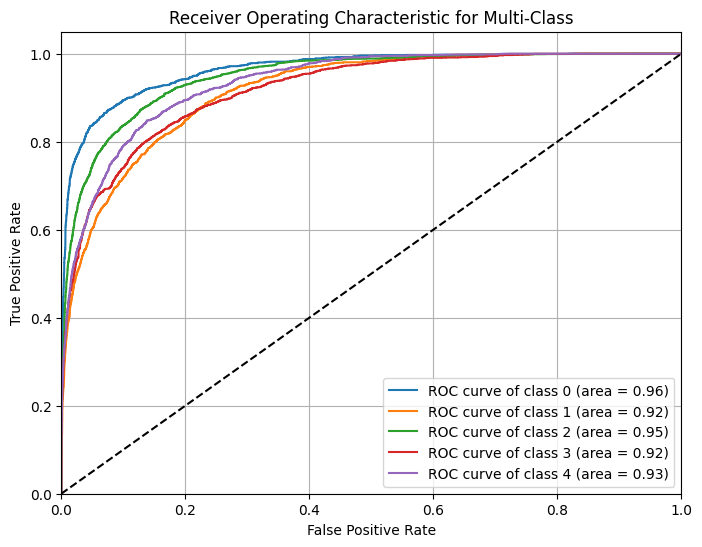

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarize the output - for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get probability scores for each class (replace with your model's prediction probabilities)
y_scores = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()